**Predictive Modeling for Maternal Health: Exploring Risk Factors in Pregnancy**

## Step 1: Loading the Dataset

In this step, we will load the dataset "Maternal Health Risk Data Set.csv" into a Python environment. Since we are using the Pyodide kernel, we are loading the dataset using the built-in Python `csv` module instead of using Pandas. After loading the data, we will inspect the first few rows to understand its structures.

In [3]:
import csv

# Open the file and read the dataset
with open('Maternal Health Risk Data Set.csv', mode='r') as file:
    reader = csv.DictReader(file)
    data = [row for row in reader]

# Display the first 5 rows of the dataset
data[:5]  # Display the first 5 rows


[{'Age': '25',
  'SystolicBP': '130',
  'DiastolicBP': '80',
  'BS': '15',
  'BodyTemp': '98',
  'HeartRate': '86',
  'RiskLevel': 'high risk'},
 {'Age': '35',
  'SystolicBP': '140',
  'DiastolicBP': '90',
  'BS': '13',
  'BodyTemp': '98',
  'HeartRate': '70',
  'RiskLevel': 'high risk'},
 {'Age': '29',
  'SystolicBP': '90',
  'DiastolicBP': '70',
  'BS': '8',
  'BodyTemp': '100',
  'HeartRate': '80',
  'RiskLevel': 'high risk'},
 {'Age': '30',
  'SystolicBP': '140',
  'DiastolicBP': '85',
  'BS': '7',
  'BodyTemp': '98',
  'HeartRate': '70',
  'RiskLevel': 'high risk'},
 {'Age': '35',
  'SystolicBP': '120',
  'DiastolicBP': '60',
  'BS': '6.1',
  'BodyTemp': '98',
  'HeartRate': '76',
  'RiskLevel': 'low risk'}]

In [2]:
# Function to print the data in a table-like format
def display_table(data):
    # Get the column names
    columns = data[0].keys()
    
    # Print the table header
    print(" | ".join(columns))
    print("-" * (len(columns) * 15))  # Add separator line

    # Print the rows
    for row in data:
        print(" | ".join([str(row[col]) for col in columns]))

# Display the first 5 rows of data in a table format
display_table(data[:5])  # Adjust number of rows as needed


Age | SystolicBP | DiastolicBP | BS | BodyTemp | HeartRate | RiskLevel
---------------------------------------------------------------------------------------------------------
25 | 130 | 80 | 15 | 98 | 86 | high risk
35 | 140 | 90 | 13 | 98 | 70 | high risk
29 | 90 | 70 | 8 | 100 | 80 | high risk
30 | 140 | 85 | 7 | 98 | 70 | high risk
35 | 120 | 60 | 6.1 | 98 | 76 | low risk


## Handling Missing Values

After loading and visualizing the dataset, the next step is to handle any **missing values** that may exist in the data. Missing data can skew the results and affect the performance of machine learning models. We will check for missing values in each column and decide how to handle them.

There are several common approaches to handling missing values:
1. **Removing rows with missing values**: This method is suitable if the missing data is limited.
2. **Imputing missing values**: This involves filling the missing values with the mean, median, or mode, depending on the nature of the data.

For this dataset, we will check for missing values and then decide whether to remove rows with missing values or impute them.


In [4]:
# Check for missing values in each column
missing_values = {key: value == '' or value is None for key, value in data[0].items()}

# Count the number of missing values in each column
missing_count = {col: sum(1 for row in data if row[col] == '' or row[col] is None) for col in data[0].keys()}

# Display missing value count for each column
missing_count


{'Age': 0,
 'SystolicBP': 0,
 'DiastolicBP': 0,
 'BS': 0,
 'BodyTemp': 0,
 'HeartRate': 0,
 'RiskLevel': 0}

There are no missing values in the dataset, as all columns show a count of 0 missing values. This means we can proceed with the analysis and modeling steps without worrying about handling missing data.

## Proceed with Data Preprocessing
Now that we've confirmed the dataset has no missing values, we can move on to the next step, which is to preprocess the data (e.g., encoding categorical variables if necessary, feature scaling, etc.).

Feature Scaling

Feature scaling is an important step in data preprocessing, especially when we are working with machine learning models like Support Vector Machine (SVM) or Gradient Boosting, which are sensitive to the magnitude of features.

Scaling ensures that each feature contributes equally to the model’s predictions, preventing models from being biased toward features with larger numeric ranges. We will use **Standardization** (also known as Z-score normalization), which scales the features to have a mean of 0 and a standard deviation of 1.

In this step, we will apply feature scaling to the numerical columns of the dataset:
- Age
- SystolicBP (Systolic Blood Pressure)
- DiastolicBP (Diastolic Blood Pressure)
- BS (Blood Glucose)
- BodyTemp (Body Temperature)
- HeartRate (Heart Rate)

We will not scale the **RiskLevel** as it is the target variable and should remain as is.


In [5]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
columns_to_scale = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Extract the relevant features from the data
scaled_data = []
for row in data:
    scaled_row = {key: row[key] for key in row if key != 'RiskLevel'}  # Exclude RiskLevel
    scaled_data.append(scaled_row)

# Convert to DataFrame for easy scaling
import pandas as pd
scaled_df = pd.DataFrame(scaled_data)

# Apply standard scaling to the features
scaler = StandardScaler()
scaled_df[columns_to_scale] = scaler.fit_transform(scaled_df[columns_to_scale])

# Show the first 5 rows of scaled data
scaled_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054


In [ ]:
## Exploratory Data Analysis (EDA)

Before jumping into model training, it’s essential to understand the data better. **Exploratory Data Analysis (EDA)** allows us to visualize, summarize, and understand the underlying patterns in the data.

In this step, we will:
1. **Check the distribution of numerical features**: We will plot histograms to understand the spread of features like age, blood pressure, glucose levels, etc.
2. **Examine the correlation between features**: A correlation matrix will help us understand relationships between the variables and the target variable.
3. **Visualize the target variable distribution**: This will give us an understanding of how the risk levels are distributed across the dataset.


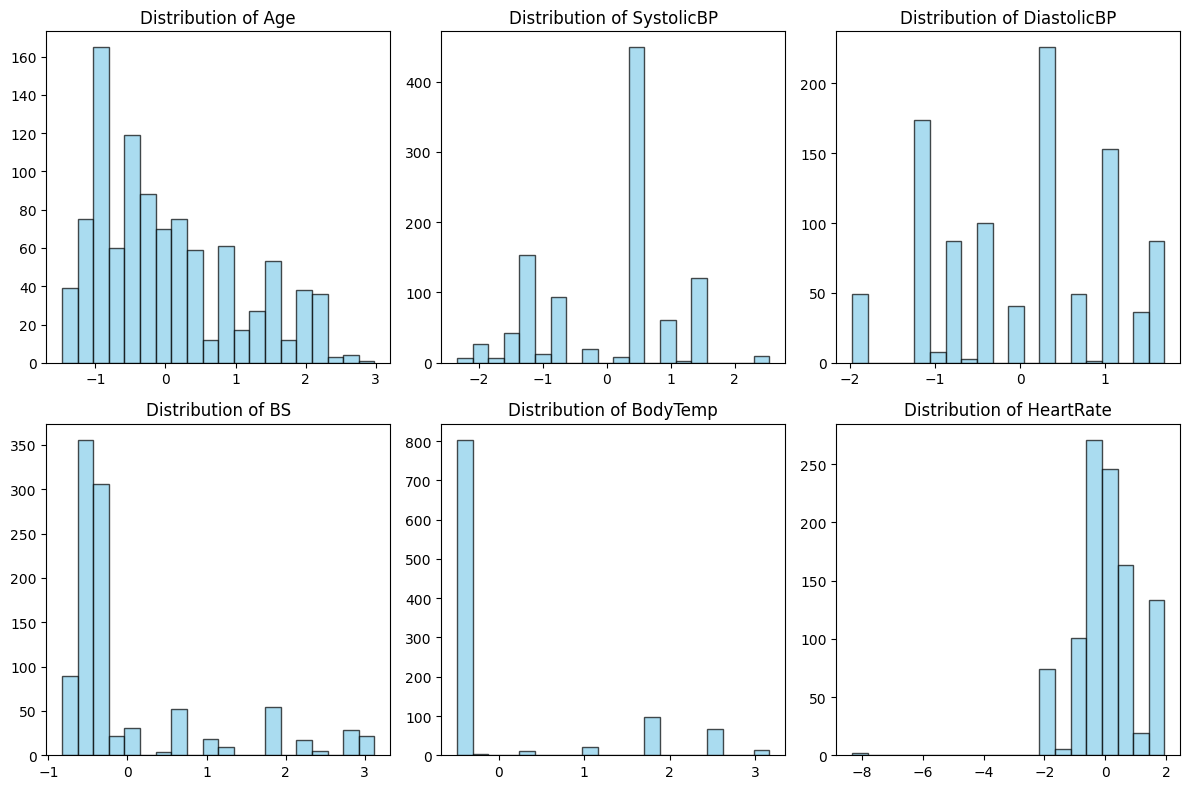

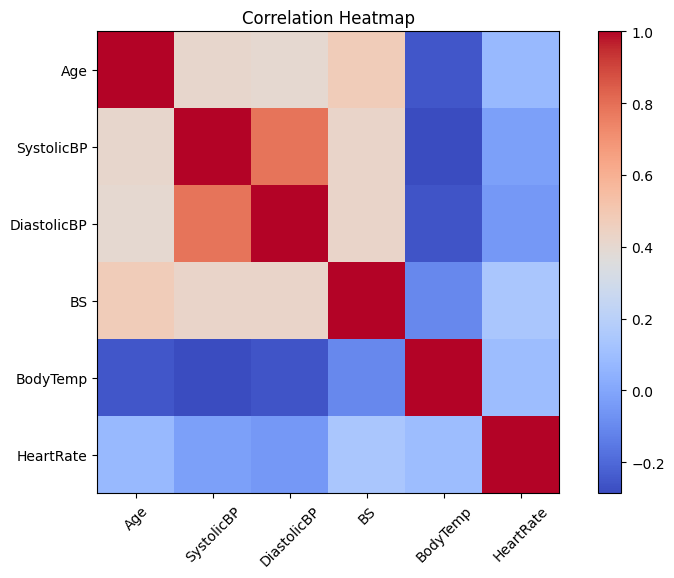

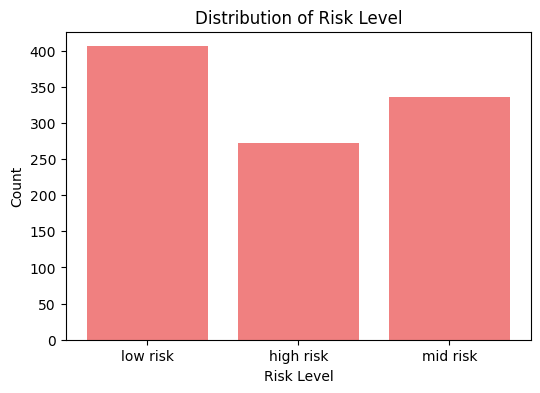

In [8]:
# Define the target variable 'RiskLevel'
y = [row['RiskLevel'] for row in data]  # Assuming 'RiskLevel' is the column name in the dataset

# 1. Distribution of numerical features (histograms)
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(scaled_df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# 2. Correlation matrix heatmap-like plot
# Compute correlation matrix manually
corr_matrix = np.corrcoef(scaled_df.T)

plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=45)
plt.yticks(range(len(numerical_columns)), numerical_columns)
plt.title('Correlation Heatmap')
plt.show()

# 3. Distribution of RiskLevel (target variable)
# Count occurrences of each unique risk level in y
risk_level_counts = {key: y.count(key) for key in set(y)}

plt.figure(figsize=(6, 4))
plt.bar(risk_level_counts.keys(), risk_level_counts.values(), color='lightcoral')
plt.title('Distribution of Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


## Additional Visualizations
In this section, we will enhance our understanding of the dataset by adding a few key visualizations. First, we’ll use a pairplot to visualize the relationships between numerical features, helping us spot correlations. Next, we’ll create boxplots for each numerical feature to identify outliers and understand the distribution. Finally, we’ll display a correlation heatmap that includes the target variable RiskLevel to visualize how each feature correlates with the target, providing insight into feature importance for prediction.

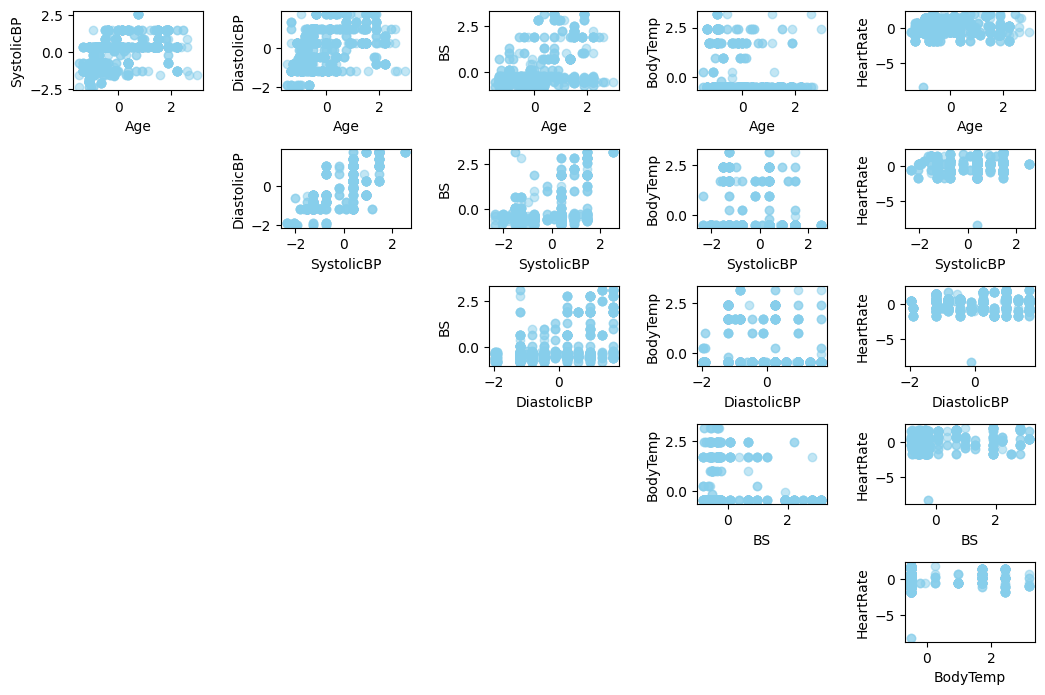

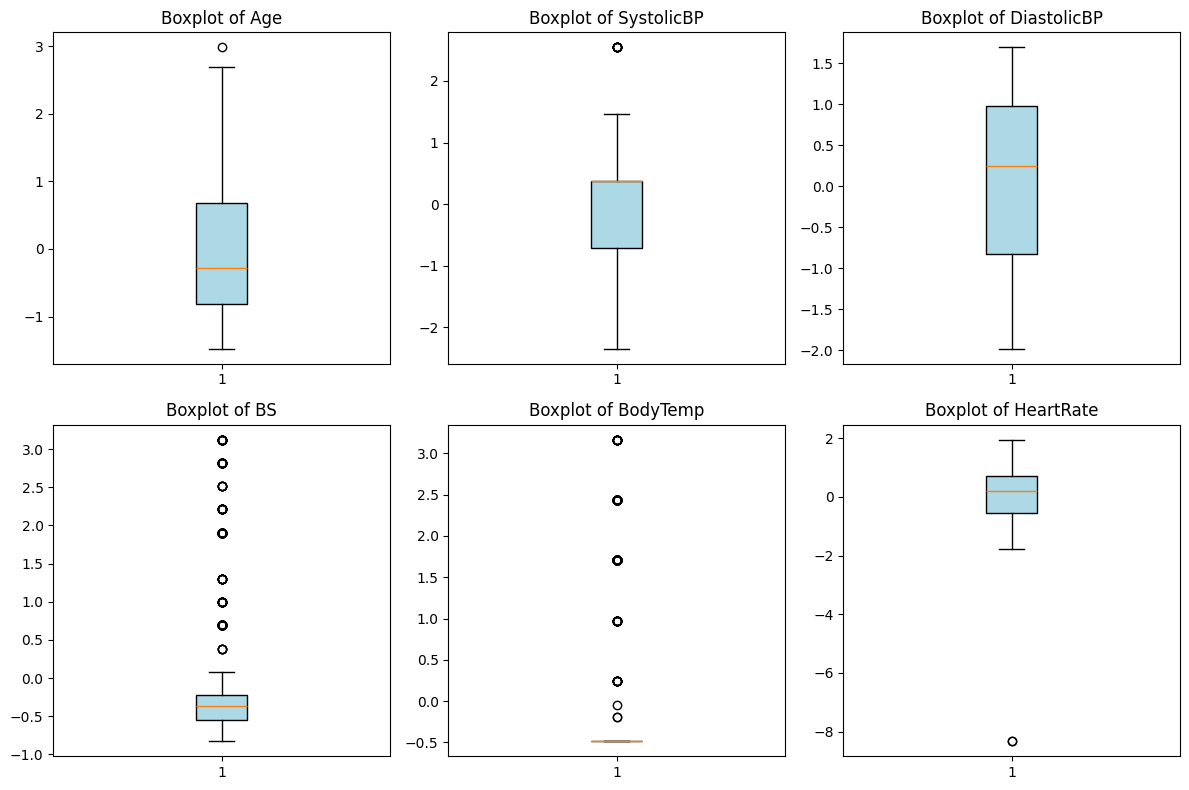

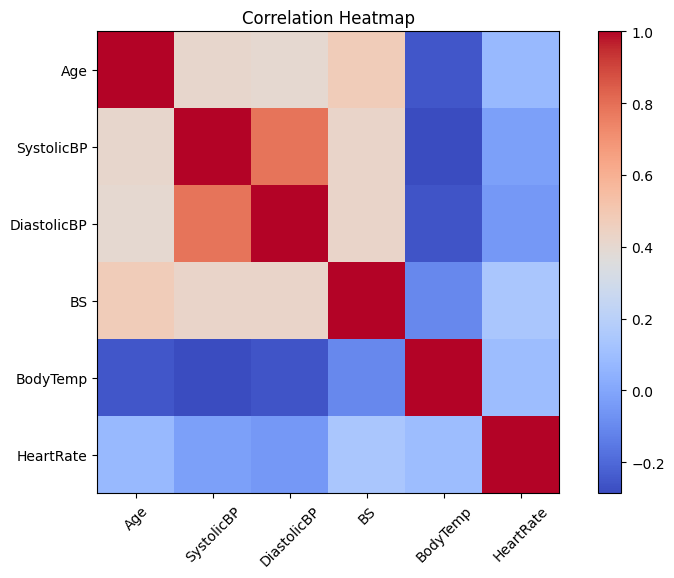

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Pairplot (Scatterplot Matrix) equivalent with Matplotlib
# Create scatter plots for each pair of features
plt.figure(figsize=(12, 8))
for i, col1 in enumerate(numerical_columns):
    for j, col2 in enumerate(numerical_columns):
        if i < j:
            plt.subplot(len(numerical_columns), len(numerical_columns), i*len(numerical_columns) + j + 1)
            plt.scatter(scaled_df[col1], scaled_df[col2], alpha=0.5, color='skyblue')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.tight_layout()
plt.show()

# 2. Boxplots for each feature (using Matplotlib)
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(scaled_df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# 3. Correlation matrix heatmap using Matplotlib
# Compute correlation matrix manually
corr_matrix = np.corrcoef(scaled_df.T)

plt.figure(figsize=(10, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=45)
plt.yticks(range(len(numerical_columns)), numerical_columns)
plt.title('Correlation Heatmap')
plt.show()


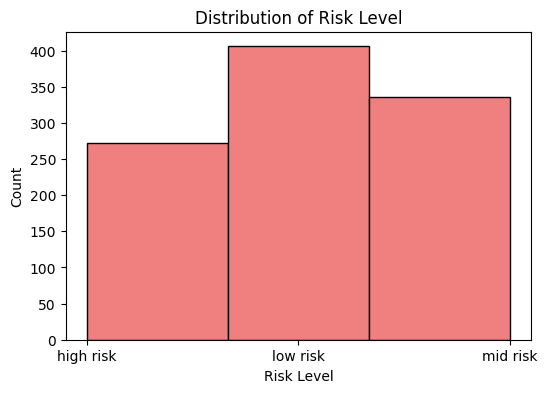

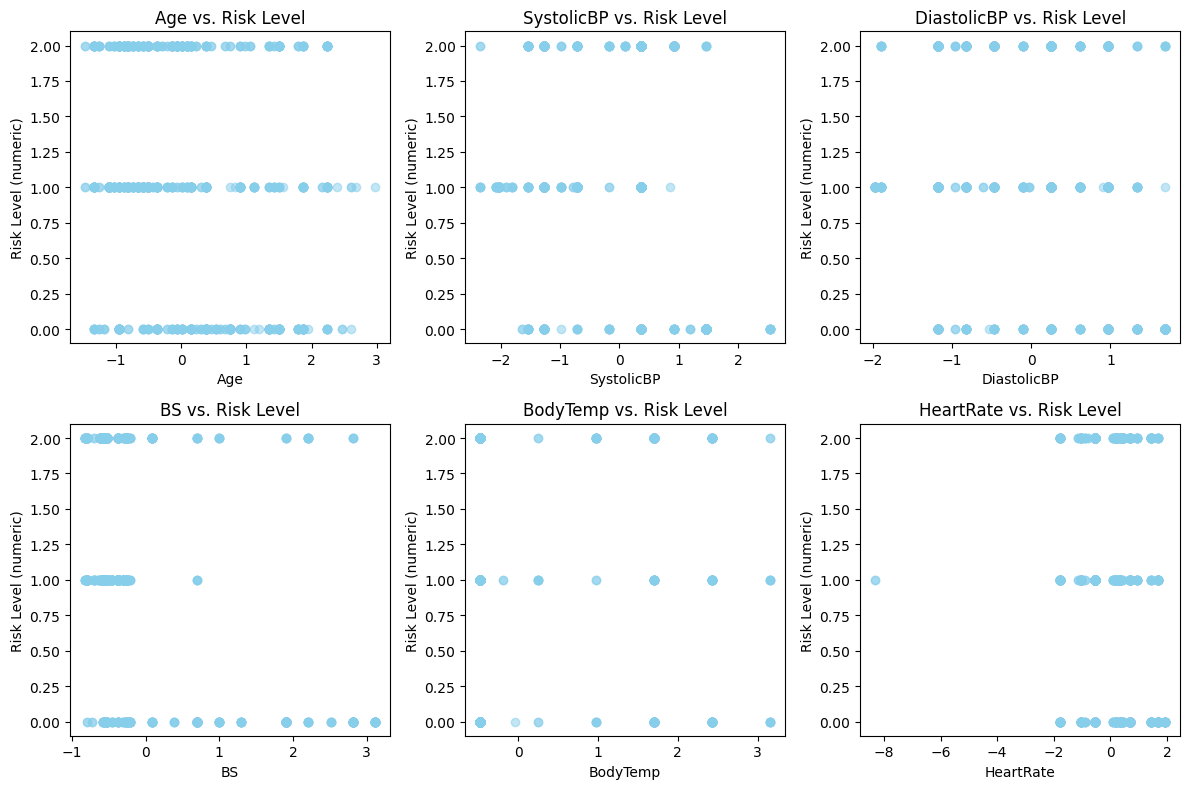

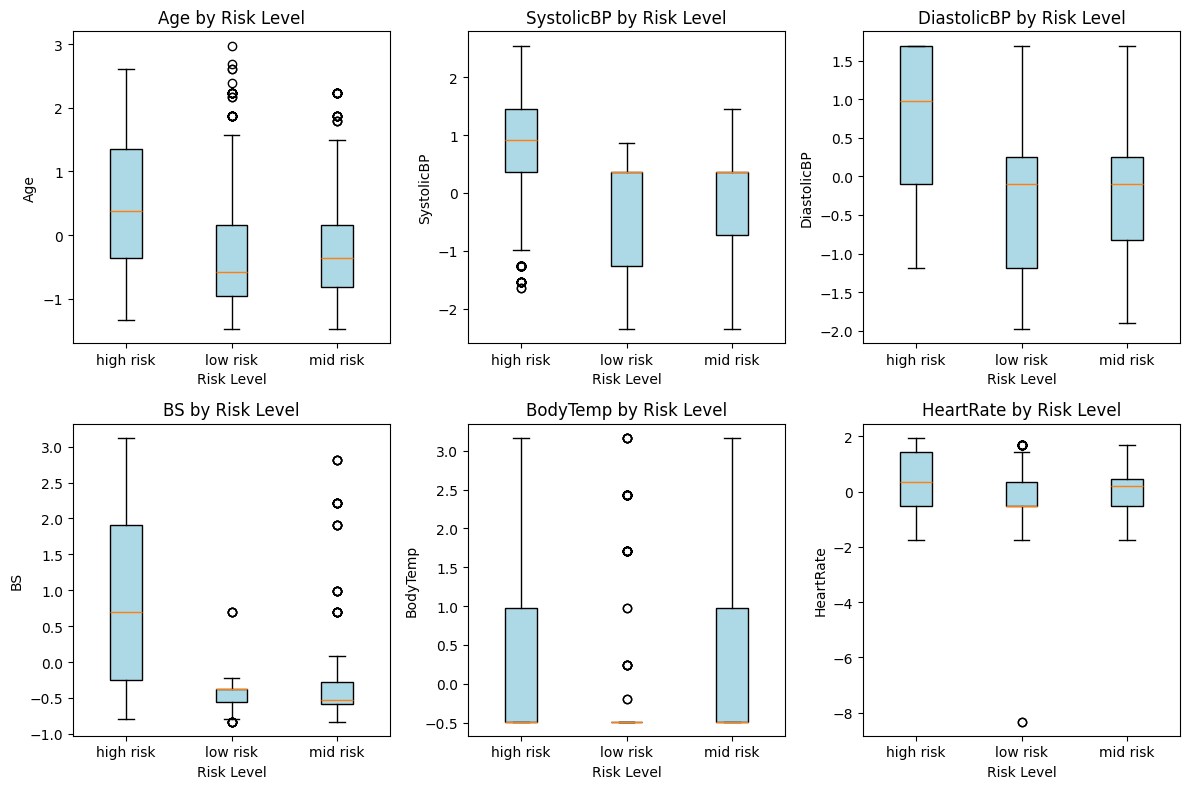

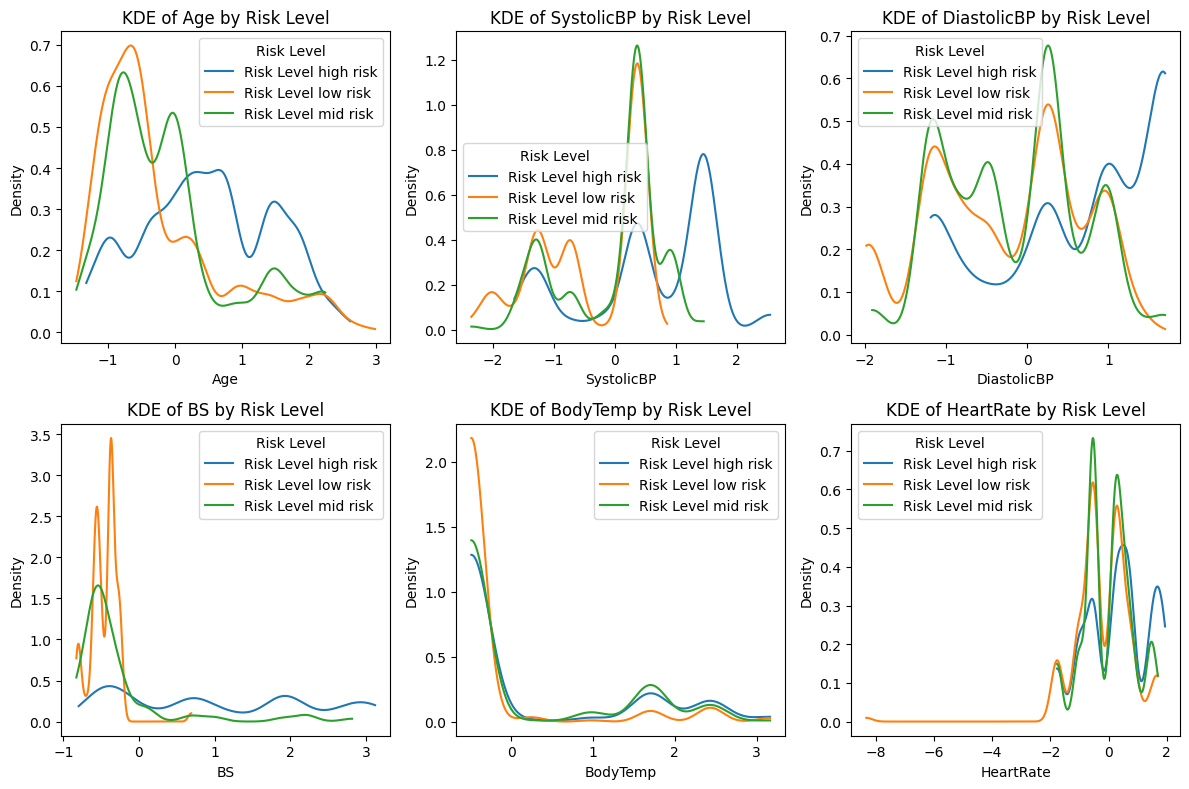

In [12]:
# 1. Histogram for RiskLevel (Target Variable)
plt.figure(figsize=(6, 4))
plt.hist(y, bins=len(set(y)), color='lightcoral', edgecolor='black')
plt.title('Distribution of Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# 2. Pairwise scatter plots for features vs. RiskLevel (Target Variable)
# Convert RiskLevel to numeric for better plotting
unique_risk_levels = sorted(set(y))
y_numeric = [unique_risk_levels.index(level) for level in y]  # Assign numeric values to each risk level

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(scaled_df[col], y_numeric, alpha=0.5, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Risk Level (numeric)')
    plt.title(f'{col} vs. Risk Level')
    plt.tight_layout()
plt.show()

# 3. Boxplots for each feature grouped by RiskLevel
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot([scaled_df[col][np.array(y_numeric) == level] for level in range(len(unique_risk_levels))],
                labels=unique_risk_levels, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'{col} by Risk Level')
    plt.xlabel('Risk Level')
    plt.ylabel(col)
    plt.tight_layout()
plt.show()

# 4. Simulate Violin Plots using KDE (Density Estimation)
from scipy.stats import gaussian_kde

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    
    # Create a Kernel Density Estimation (KDE) for each RiskLevel group
    for risk_level in range(len(unique_risk_levels)):
        # Get the data for the current risk level
        data_for_level = np.array(scaled_df[col])[np.array(y_numeric) == risk_level]
        
        # Estimate the density using KDE
        kde = gaussian_kde(data_for_level, bw_method=0.2)
        x_range = np.linspace(min(data_for_level), max(data_for_level), 1000)
        plt.plot(x_range, kde(x_range), label=f'Risk Level {unique_risk_levels[risk_level]}')
    
    plt.title(f'KDE of {col} by Risk Level')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title="Risk Level")
    plt.tight_layout()
plt.show()


## Model Training and Evaluation
In this step, we will train three machine learning models: Support Vector Machine (SVM), Random Forest Classifier, and Gradient Boosting Machine (GBM). First, we prepare the data by splitting it into training and testing sets. We then initialize the models and train them using the training data. After training, we use GridSearchCV to tune hyperparameters for each model and find the best configuration to improve performance.

Next, we evaluate the models using multiple metrics such as Accuracy, Precision, Recall, F1-Score, and AUC-ROC. These evaluation metrics will help us understand the strengths and weaknesses of each model, enabling us to compare their performance on the test data. The goal is to determine which model performs best at predicting the RiskLevel of maternal health based on the features in the dataset.

Through this process, we aim to identify the most accurate and efficient model for maternal health risk prediction. The hyperparameter tuning step helps optimize model parameters to achieve the best performance possible, while the evaluation provides insight into how each model handles different aspects of prediction accuracy.

In [13]:
from sklearn.model_selection import train_test_split

# Prepare the features and target variable
X = scaled_df
y = [row['RiskLevel'] for row in data]  # Assuming 'RiskLevel' is the target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Initialize the models
svm_model = SVC()
gbm_model = GradientBoostingClassifier()
rf_model = RandomForestClassifier()

# Train the models
svm_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Display a message to confirm training completion
"Models trained successfully!"


'Models trained successfully!'

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set using all three models
y_pred_svm = svm_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gbm = gbm_model.predict(X_test)

# Function to evaluate models (excluding AUC-ROC for now)
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }

# Evaluate each model
svm_metrics = evaluate_model(y_test, y_pred_svm)
rf_metrics = evaluate_model(y_test, y_pred_rf)
gbm_metrics = evaluate_model(y_test, y_pred_gbm)

# Display the evaluation metrics for all models
svm_metrics, rf_metrics, gbm_metrics


({'Accuracy': 0.6798029556650246,
  'Precision': 0.7009638038123795,
  'Recall': 0.6798029556650246,
  'F1-Score': 0.6577936816116694},
 {'Accuracy': 0.8078817733990148,
  'Precision': 0.8166844724177426,
  'Recall': 0.8078817733990148,
  'F1-Score': 0.8083383211303122},
 {'Accuracy': 0.7487684729064039,
  'Precision': 0.7486902807099851,
  'Recall': 0.7487684729064039,
  'F1-Score': 0.7483625641741706})

In [17]:
from sklearn.metrics import classification_report

# Generate the classification report for each model
svm_classification_report = classification_report(y_test, y_pred_svm)
rf_classification_report = classification_report(y_test, y_pred_rf)
gbm_classification_report = classification_report(y_test, y_pred_gbm)

# Display the classification reports
print("SVM Classification Report:\n", svm_classification_report)
print("Random Forest Classification Report:\n", rf_classification_report)
print("GBM Classification Report:\n", gbm_classification_report)


SVM Classification Report:
               precision    recall  f1-score   support

   high risk       0.80      0.85      0.82        47
    low risk       0.61      0.88      0.72        80
    mid risk       0.74      0.37      0.49        76

    accuracy                           0.68       203
   macro avg       0.72      0.70      0.68       203
weighted avg       0.70      0.68      0.66       203

Random Forest Classification Report:
               precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.87      0.74      0.80        80
    mid risk       0.73      0.86      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.81      0.82       203
weighted avg       0.82      0.81      0.81       203

GBM Classification Report:
               precision    recall  f1-score   support

   high risk       0.83      0.83      0.83        47
    low risk       0.73      0.76  

In [18]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for SVM
param_grid_svm = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [10, 20, 30]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Hyperparameter tuning for Gradient Boosting
param_grid_gbm = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(), param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV for each model
grid_search_svm.best_params_, grid_search_rf.best_params_, grid_search_gbm.best_params_


({'C': 10, 'kernel': 'rbf'},
 {'max_depth': 30, 'n_estimators': 150},
 {'learning_rate': 0.2, 'n_estimators': 150})

In [19]:
# Retrain the SVM model with the best hyperparameters
svm_best_model = SVC(C=10, kernel='rbf')
svm_best_model.fit(X_train, y_train)

# Retrain the Random Forest model with the best hyperparameters
rf_best_model = RandomForestClassifier(max_depth=30, n_estimators=150)
rf_best_model.fit(X_train, y_train)

# Retrain the Gradient Boosting model with the best hyperparameters
gbm_best_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)
gbm_best_model.fit(X_train, y_train)

# Make predictions with the best models
y_pred_svm_best = svm_best_model.predict(X_test)
y_pred_rf_best = rf_best_model.predict(X_test)
y_pred_gbm_best = gbm_best_model.predict(X_test)

# Evaluate the best models
svm_best_metrics = evaluate_model(y_test, y_pred_svm_best)
rf_best_metrics = evaluate_model(y_test, y_pred_rf_best)
gbm_best_metrics = evaluate_model(y_test, y_pred_gbm_best)

# Display the evaluation metrics for the best models
svm_best_metrics, rf_best_metrics, gbm_best_metrics


({'Accuracy': 0.6847290640394089,
  'Precision': 0.6974594783925413,
  'Recall': 0.6847290640394089,
  'F1-Score': 0.6690336799220264},
 {'Accuracy': 0.812807881773399,
  'Precision': 0.8185226557560207,
  'Recall': 0.812807881773399,
  'F1-Score': 0.8133756247898278},
 {'Accuracy': 0.8029556650246306,
  'Precision': 0.8024339811813423,
  'Recall': 0.8029556650246306,
  'F1-Score': 0.8025574712643677})

In [20]:
from sklearn.metrics import classification_report

# Generate the classification report for each model after hyperparameter tuning
svm_best_classification_report = classification_report(y_test, y_pred_svm_best)
rf_best_classification_report = classification_report(y_test, y_pred_rf_best)
gbm_best_classification_report = classification_report(y_test, y_pred_gbm_best)

# Display the classification reports for the best models
print("SVM Best Classification Report:\n", svm_best_classification_report)
print("Random Forest Best Classification Report:\n", rf_best_classification_report)
print("GBM Best Classification Report:\n", gbm_best_classification_report)


SVM Best Classification Report:
               precision    recall  f1-score   support

   high risk       0.76      0.83      0.80        47
    low risk       0.63      0.85      0.72        80
    mid risk       0.73      0.42      0.53        76

    accuracy                           0.68       203
   macro avg       0.71      0.70      0.68       203
weighted avg       0.70      0.68      0.67       203

Random Forest Best Classification Report:
               precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203

GBM Best Classification Report:
               precision    recall  f1-score   support

   high risk       0.84      0.87      0.85        47
    low risk       0

In [22]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.svm import SVC

# Retrain the SVM model with probability=True
svm_best_model = SVC(C=10, kernel='rbf', probability=True)
svm_best_model.fit(X_train, y_train)

# Retrain the Random Forest model with the best hyperparameters
rf_best_model = RandomForestClassifier(max_depth=30, n_estimators=150)
rf_best_model.fit(X_train, y_train)

# Retrain the Gradient Boosting model with the best hyperparameters
gbm_best_model = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150)
gbm_best_model.fit(X_train, y_train)

# Get predicted probabilities for AUC-ROC calculation
y_pred_svm_best_prob = svm_best_model.predict_proba(X_test)
y_pred_rf_best_prob = rf_best_model.predict_proba(X_test)
y_pred_gbm_best_prob = gbm_best_model.predict_proba(X_test)

# Generate the classification report for each model after hyperparameter tuning
svm_best_classification_report = classification_report(y_test, svm_best_model.predict(X_test))
rf_best_classification_report = classification_report(y_test, rf_best_model.predict(X_test))
gbm_best_classification_report = classification_report(y_test, gbm_best_model.predict(X_test))

# Calculate AUC-ROC for each model
svm_best_auc_roc = roc_auc_score(y_test, y_pred_svm_best_prob, multi_class='ovr')
rf_best_auc_roc = roc_auc_score(y_test, y_pred_rf_best_prob, multi_class='ovr')
gbm_best_auc_roc = roc_auc_score(y_test, y_pred_gbm_best_prob, multi_class='ovr')

# Display the classification reports and AUC-ROC for the best models
print("SVM Best Classification Report:\n", svm_best_classification_report)
print("SVM Best AUC-ROC:", svm_best_auc_roc)
print("\nRandom Forest Best Classification Report:\n", rf_best_classification_report)
print("Random Forest Best AUC-ROC:", rf_best_auc_roc)
print("\nGBM Best Classification Report:\n", gbm_best_classification_report)
print("GBM Best AUC-ROC:", gbm_best_auc_roc)


SVM Best Classification Report:
               precision    recall  f1-score   support

   high risk       0.76      0.83      0.80        47
    low risk       0.63      0.85      0.72        80
    mid risk       0.73      0.42      0.53        76

    accuracy                           0.68       203
   macro avg       0.71      0.70      0.68       203
weighted avg       0.70      0.68      0.67       203

SVM Best AUC-ROC: 0.8367084189074844

Random Forest Best Classification Report:
               precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.78      0.82        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Random Forest Best AUC-ROC: 0.9346624935598755

GBM Best Classification Report:
               precision    recall  f1-score